In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import scipy.stats as stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
import joblib


In [2]:
df = pd.read_csv("Shilong-1.csv")


In [3]:
df

,Unnamed: 0,T2M,PRECTOTCORR,DY,MO,YEAR,RH2M,WD50M,WS2M
0,0,11.65,0.0,1,1,2011,90.44,239.00,1.61
1,1,10.69,1.0,2,1,2011,86.12,208.19,0.99
2,2,11.40,1.0,3,1,2011,84.50,139.88,0.98
3,3,10.40,1.0,4,1,2011,83.25,136.19,1.02
4,4,10.59,1.0,5,1,2011,84.44,140.56,1.24
...,...,...,...,...,...,...,...,...,...
3738,3738,20.42,1.0,27,3,2021,35.88,272.69,1.44
3739,3739,21.01,1.0,28,3,2021,39.12,268.94,1.48
3740,3740,20.71,0.0,29,3,2021,56.69,209.06,1.39
3741,3741,19.64,0.0,30,3,2021,81.12,168.81,1.54


In [4]:
d=df.drop(['Unnamed: 0'],axis=1)

In [5]:
df=d.copy()

In [6]:
X = df.drop(["PRECTOTCORR", "DY","MO","YEAR","RH2M","WS2M",'WD50M'], axis=1)
Y = df["PRECTOTCORR"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size =0.2, stratify = Y, random_state = 0)

In [8]:
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info


array([0.2988301])

In [9]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)


T2M    0.29883
dtype: float64

<AxesSubplot:>

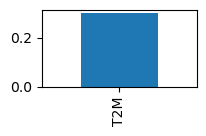

In [10]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(2, 1))


In [11]:
sm = SMOTE(random_state=0)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_res)))


The number of classes before fit Counter({0.0: 1947, 1.0: 1047})
The number of classes after fit Counter({0.0: 1947, 1.0: 1947})


In [12]:
logreg = LogisticRegression()
logreg.fit(X_train_res, y_train_res)


LogisticRegression()

In [13]:
y_pred2 = logreg.predict(X_test)
print(confusion_matrix(y_test,y_pred2))
print(accuracy_score(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

[[404  83]
 [ 57 205]]
0.8130841121495327
              precision    recall  f1-score   support

         0.0       0.88      0.83      0.85       487
         1.0       0.71      0.78      0.75       262

    accuracy                           0.81       749
   macro avg       0.79      0.81      0.80       749
weighted avg       0.82      0.81      0.81       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.8060057682963149

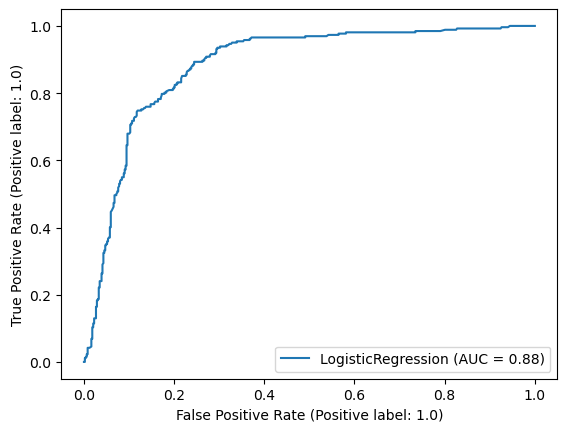

In [14]:
metrics.plot_roc_curve(logreg, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred2, average=None)


In [15]:
gnb = GaussianNB()
gnb.fit(X_train_res, y_train_res)


GaussianNB()

In [16]:
y_pred3 = gnb.predict(X_test)
print(confusion_matrix(y_test,y_pred3))
print(accuracy_score(y_test,y_pred3))
print(classification_report(y_test,y_pred3))

[[411  76]
 [ 61 201]]
0.8170894526034713
              precision    recall  f1-score   support

         0.0       0.87      0.84      0.86       487
         1.0       0.73      0.77      0.75       262

    accuracy                           0.82       749
   macro avg       0.80      0.81      0.80       749
weighted avg       0.82      0.82      0.82       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.8055590388262772

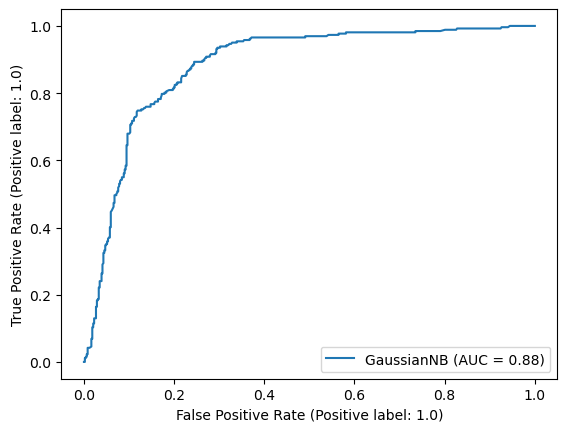

In [17]:
metrics.plot_roc_curve(gnb, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred3, average=None)


In [18]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_res, y_train_res)


KNeighborsClassifier(n_neighbors=3)

In [19]:
y_pred4 = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred4))
print(accuracy_score(y_test,y_pred4))
print(classification_report(y_test,y_pred4))

[[391  96]
 [ 58 204]]
0.794392523364486
              precision    recall  f1-score   support

         0.0       0.87      0.80      0.84       487
         1.0       0.68      0.78      0.73       262

    accuracy                           0.79       749
   macro avg       0.78      0.79      0.78       749
weighted avg       0.80      0.79      0.80       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [20]:
from sklearn.metrics import RocCurveDisplay

/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.790750348762481

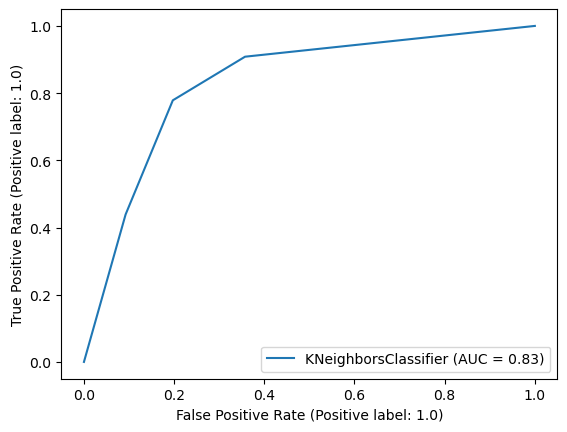

In [21]:
metrics.plot_roc_curve(knn, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred4, average=None)


In [22]:
svc = SVC()


In [23]:
svc.fit(X_train_res, y_train_res)


SVC()

In [24]:
y_pred5 = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred5))
print(accuracy_score(y_test,y_pred5))
print(classification_report(y_test,y_pred5))

[[381 106]
 [ 39 223]]
0.8064085447263017
              precision    recall  f1-score   support

         0.0       0.91      0.78      0.84       487
         1.0       0.68      0.85      0.75       262

    accuracy                           0.81       749
   macro avg       0.79      0.82      0.80       749
weighted avg       0.83      0.81      0.81       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.8167429502954684

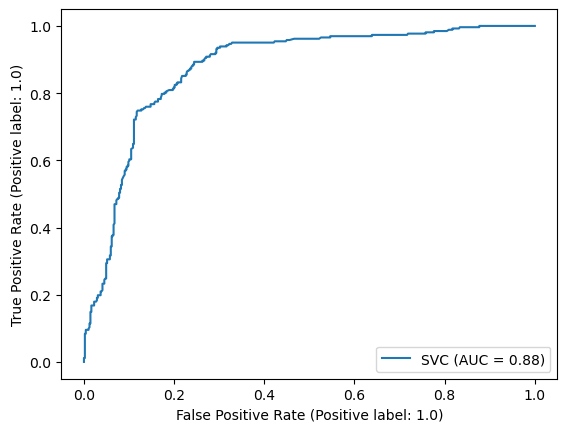

In [25]:
metrics.plot_roc_curve(svc, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred5, average=None)


In [26]:
# create model instance
bst = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
y_pred6 = bst.predict(X_test)

In [27]:
# y_pred6 = xgb.predict(X_test)
print(confusion_matrix(y_test,y_pred6))
print(accuracy_score(y_test,y_pred6))
print(classification_report(y_test,y_pred6))

[[398  89]
 [ 52 210]]
0.8117489986648865
              precision    recall  f1-score   support

         0.0       0.88      0.82      0.85       487
         1.0       0.70      0.80      0.75       262

    accuracy                           0.81       749
   macro avg       0.79      0.81      0.80       749
weighted avg       0.82      0.81      0.81       749



In [28]:
rf=RandomForestClassifier()
rf.fit(X_train_res,y_train_res)

RandomForestClassifier()

In [29]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[394  93]
 [ 75 187]]
0.7757009345794392
              precision    recall  f1-score   support

         0.0       0.84      0.81      0.82       487
         1.0       0.67      0.71      0.69       262

    accuracy                           0.78       749
   macro avg       0.75      0.76      0.76       749
weighted avg       0.78      0.78      0.78       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.7613876828064015

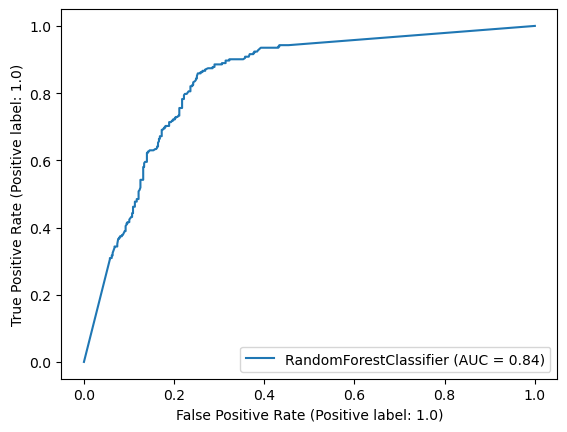

In [30]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None)


In [31]:
cat = CatBoostClassifier(iterations=2000, eval_metric="AUC")
cat.fit(X_train_res, y_train_res)


Learning rate set to 0.00975
0:	total: 47.9ms	remaining: 1m 35s
1:	total: 48.9ms	remaining: 48.9s
2:	total: 49.9ms	remaining: 33.2s
3:	total: 50.8ms	remaining: 25.3s
4:	total: 51.7ms	remaining: 20.6s
5:	total: 52.7ms	remaining: 17.5s
6:	total: 53.6ms	remaining: 15.3s
7:	total: 54.6ms	remaining: 13.6s
8:	total: 55.4ms	remaining: 12.3s
9:	total: 56.4ms	remaining: 11.2s
10:	total: 57.4ms	remaining: 10.4s
11:	total: 58.3ms	remaining: 9.66s
12:	total: 59.2ms	remaining: 9.05s
13:	total: 60ms	remaining: 8.51s
14:	total: 60.9ms	remaining: 8.06s
15:	total: 61.9ms	remaining: 7.67s
16:	total: 62.8ms	remaining: 7.33s
17:	total: 63.8ms	remaining: 7.02s
18:	total: 64.7ms	remaining: 6.75s
19:	total: 65.7ms	remaining: 6.51s
20:	total: 66.6ms	remaining: 6.28s
21:	total: 67.7ms	remaining: 6.08s
22:	total: 68.6ms	remaining: 5.89s
23:	total: 69.5ms	remaining: 5.72s
24:	total: 70.4ms	remaining: 5.56s
25:	total: 71.1ms	remaining: 5.4s
26:	total: 72.1ms	remaining: 5.27s
27:	total: 73.1ms	remaining: 5.15s
28:

In [32]:
y_pred = cat.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[389  98]
 [ 40 222]]
0.8157543391188251
              precision    recall  f1-score   support

         0.0       0.91      0.80      0.85       487
         1.0       0.69      0.85      0.76       262

    accuracy                           0.82       749
   macro avg       0.80      0.82      0.81       749
weighted avg       0.83      0.82      0.82       749



/home/unknown/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


0.8230481057102998

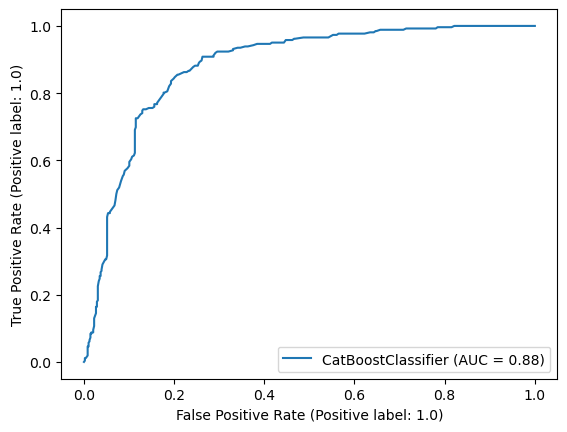

In [33]:
from sklearn import metrics
metrics.plot_roc_curve(cat, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred, average=None) 

In [34]:
joblib.dump(rf, "rf.pkl")
joblib.dump(logreg, "logreg.pkl")
joblib.dump(gnb, "gnb.pkl")
joblib.dump(knn, "knn.pkl")
joblib.dump(svc, "svc.pkl")
joblib.dump(bst, "xgb.pkl")
joblib.dump(svc, "cat.pkl")

['cat.pkl']